<h1 style = 'color:brown'>Regression Trees </h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

%matplotlib inline

In [2]:
path = 'data/breastCancer.csv'
data = pd.read_csv(path)
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


 **Regression tree**

- A regression tree, also known as a **decision tree for regression**, is a machine learning algorithm used for *predicting continuous numerical values*. It is a type of supervised learning algorithm that learns a hierarchical structure of if-else decision rules based on the input features to predict the output.


- The regression tree algorithm *recursively partitions the input space into non-overlapping regions*, each associated with a predicted value. This partitioning is based on *finding optimal splits on the input features that maximize the reduction in the variability of the predicted values within each region*.

    A high-level overview of how a regression tree is constructed:

    1. Root Node: The tree starts with a root node, which represents the entire dataset.

    2. Splitting: The algorithm selects the best feature and split point that maximally separates the data based on some criterion. This criterion can be based on various measures such as mean squared error (MSE), mean absolute error (MAE), or variance reduction.

    3. Recursive Splitting: The dataset is partitioned into two or more subsets based on the selected split point. This splitting process continues recursively for each resulting subset until a stopping condition is met, such as reaching a maximum depth or a minimum number of samples in a node.

    4. Leaf Nodes: At each leaf node, a predicted value is assigned based on the mean or median value of the target variable in that region.

    5. Prediction: To make predictions for new instances, the input traverses the tree from the root node down to the appropriate leaf node based on the feature values. The predicted value associated with the leaf node is returned as the final prediction.
    

- The key advantages of regression trees include their ability to handle non-linear relationships, handle both numerical and categorical features, and provide interpretability in terms of the learned decision rules. However, they can be prone to overfitting, especially when the tree is grown too deep or when the dataset has noisy or irrelevant features.

- To address the overfitting issue, techniques like pruning, ensemble methods (e.g., random forests, gradient boosting), or using regularization parameters can be applied.

- Regression trees are widely used in various applications, including finance, healthcare, and marketing, where the goal is to predict continuous numerical values based on input features and interpret the learned decision rules.

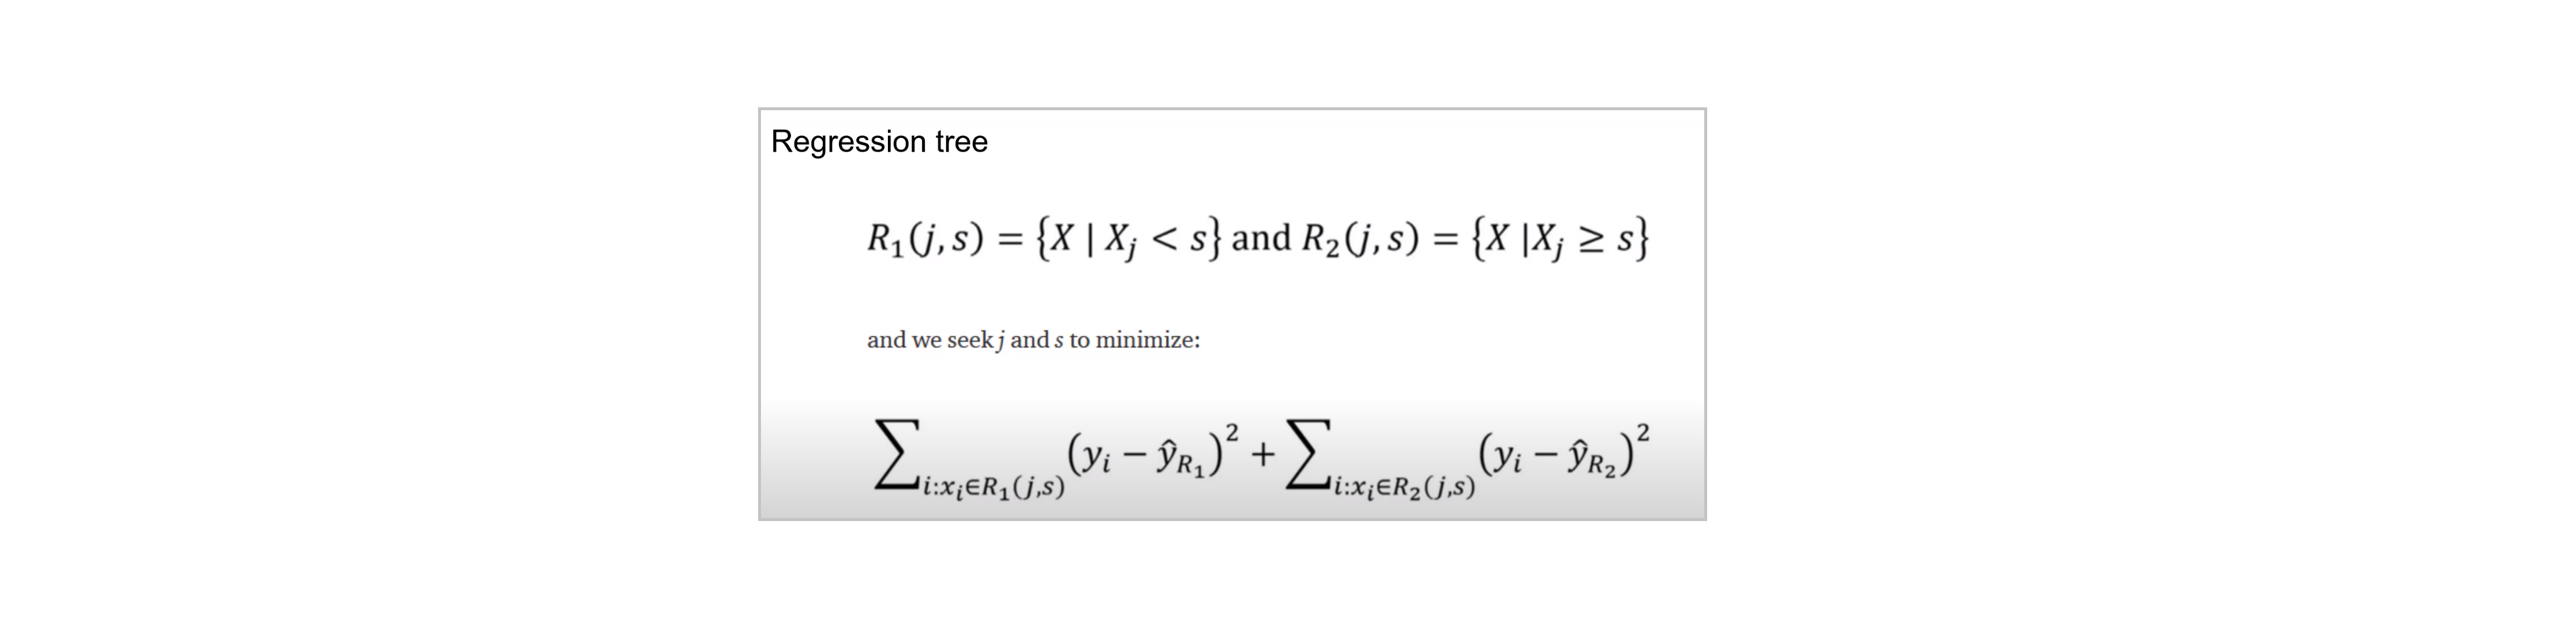

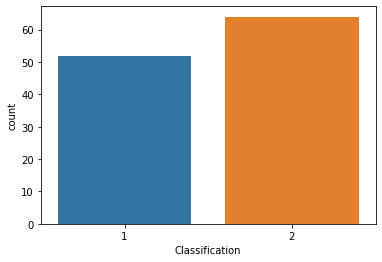

In [3]:
x = data['Classification']
ax = sns.countplot(x=x,data = data)

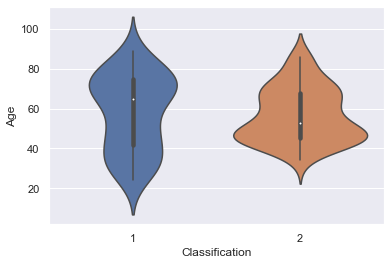

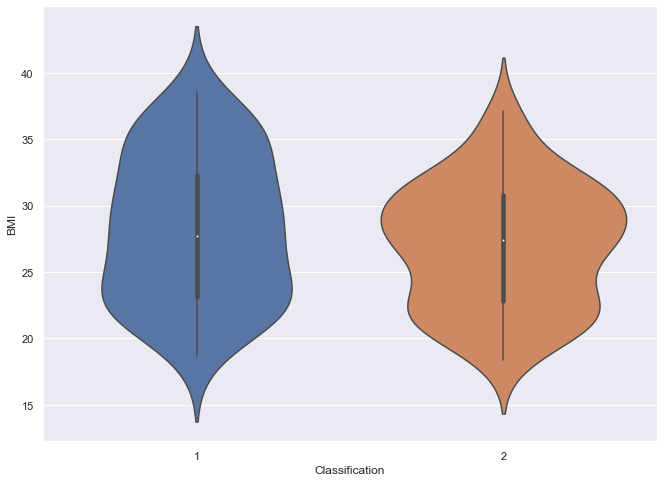

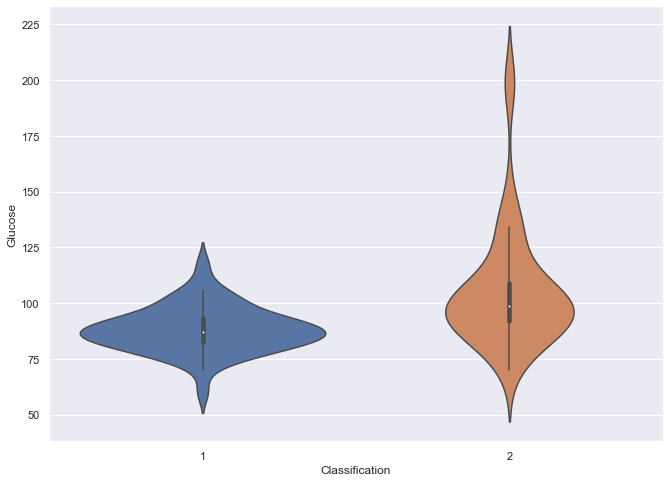

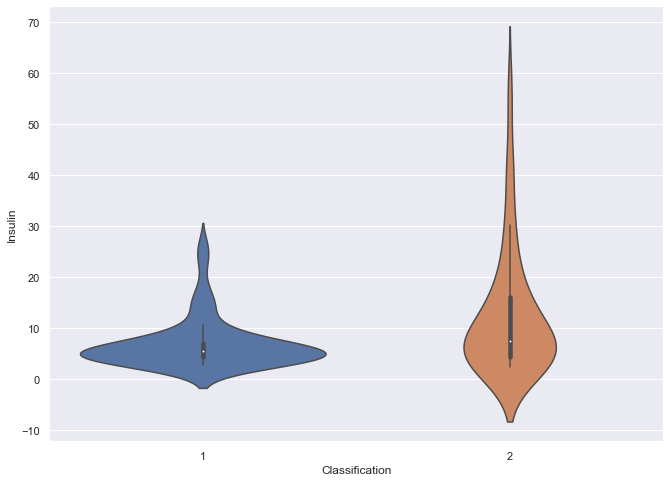

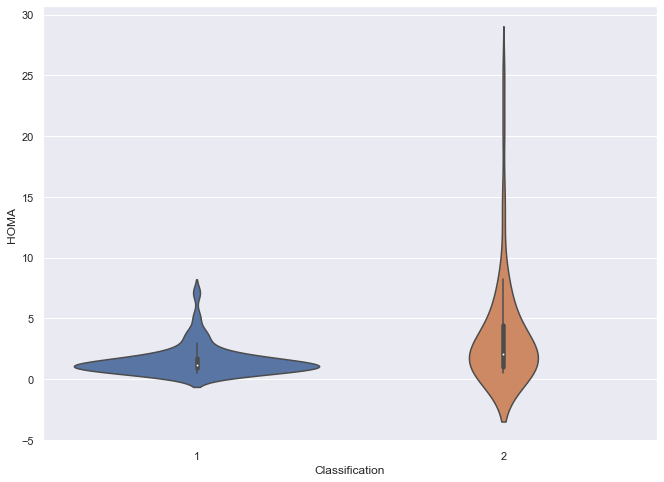

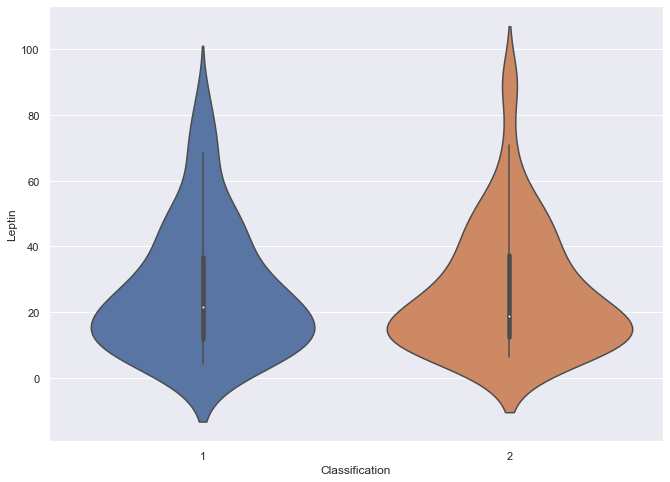

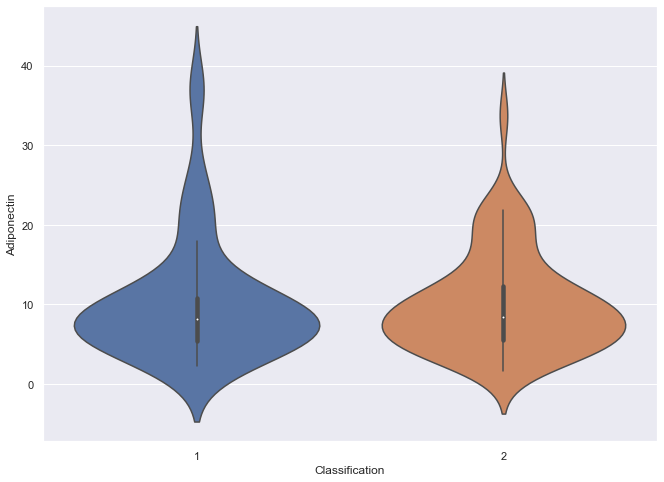

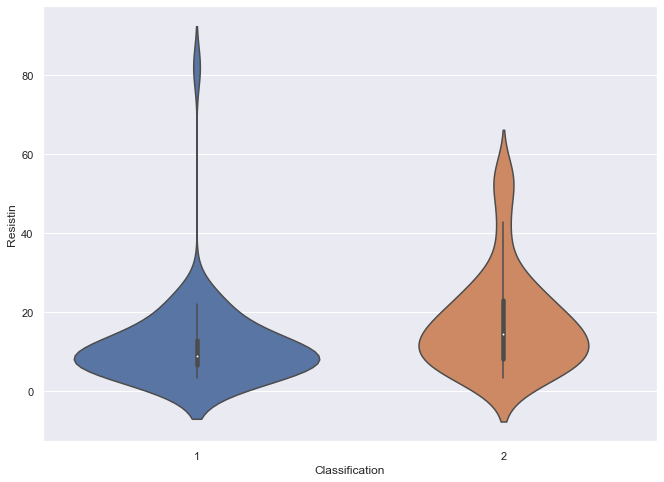

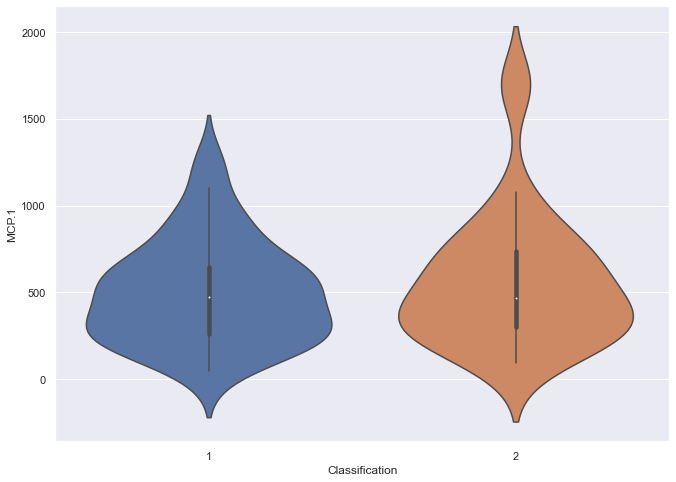

In [4]:
def violin_plots(x,y,data):
    for i,col in enumerate(y):
        plt.figure(i)
        sns.set(rc={'figure.figsize':(11,8)})
        ax = sns.violinplot(x=x,y = col,data=data)
        
y = data.columns[:-1]
x = data.columns[-1]

violin_plots(x,y,data)

#### Preprocessing

In [5]:
for col in data.columns:
    count_blank = data[col].isnull().sum()
    print(f'{col} : {count_blank}')

Age : 0
BMI : 0
Glucose : 0
Insulin : 0
HOMA : 0
Leptin : 0
Adiponectin : 0
Resistin : 0
MCP.1 : 0
Classification : 0


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])

data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0


In [7]:
from sklearn.model_selection import train_test_split

y = data['Classification'].values.reshape(-1,1)
X = data.drop(['Classification'],axis = 1)

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 42)

### Baseline Decision Tree

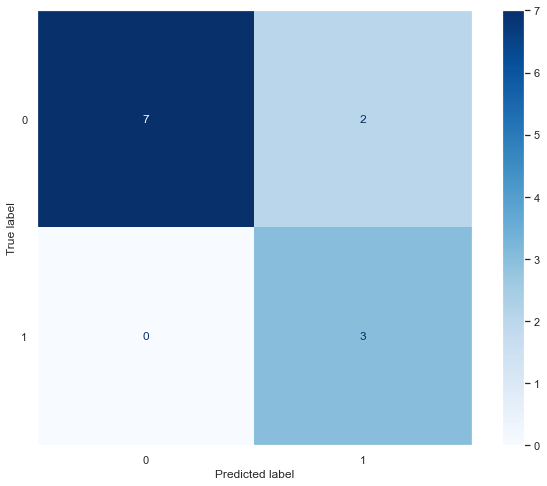

In [8]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

ConfusionMatrixDisplay.from_estimator(clf,X_test,y_test,cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

[Text(0.4861111111111111, 0.9285714285714286, 'x[2] <= 91.5\ngini = 0.485\nsamples = 104\nvalue = [43, 61]'),
 Text(0.3055555555555556, 0.7857142857142857, 'x[0] <= 44.5\ngini = 0.454\nsamples = 43\nvalue = [28, 15]'),
 Text(0.25, 0.6428571428571429, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.3611111111111111, 0.6428571428571429, 'x[7] <= 14.227\ngini = 0.5\nsamples = 30\nvalue = [15, 15]'),
 Text(0.2222222222222222, 0.5, 'x[0] <= 46.5\ngini = 0.36\nsamples = 17\nvalue = [13, 4]'),
 Text(0.1111111111111111, 0.35714285714285715, 'x[5] <= 26.425\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.05555555555555555, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.16666666666666666, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.35714285714285715, 'x[7] <= 3.295\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(0.2777777777777778, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.

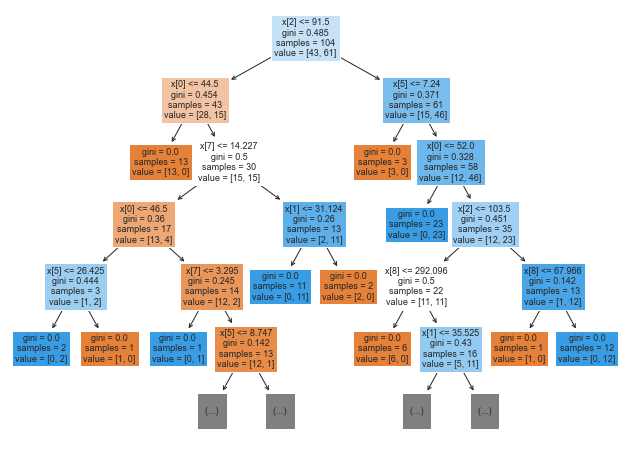

In [9]:
# Plot Decision Tree
from sklearn.tree import plot_tree

plot_tree(clf,max_depth =5,filled = True)

## Bagging

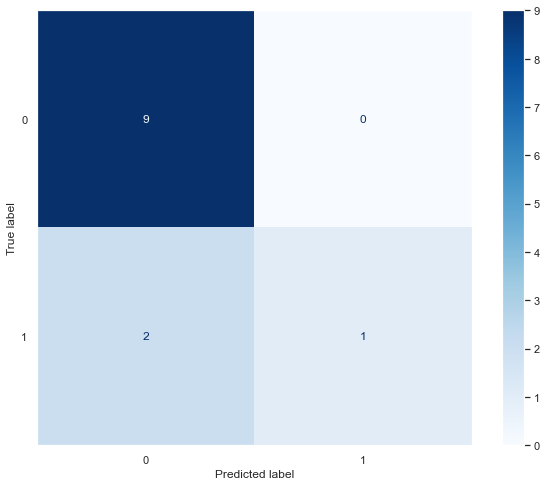

In [10]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier()
bagging_clf.fit(X_train,y_train.ravel())

ConfusionMatrixDisplay.from_estimator(bagging_clf,X_test,y_test,cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

### Random forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

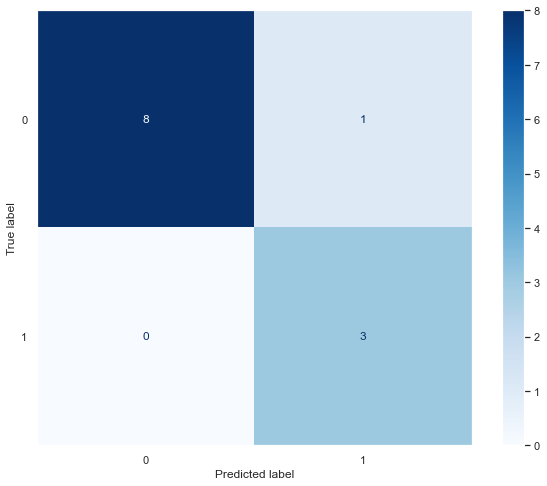

In [12]:
random_clf = RandomForestClassifier(100)
random_clf.fit(X_train,y_train.ravel())
ConfusionMatrixDisplay.from_estimator(random_clf,X_test,y_test,cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

## Boosting

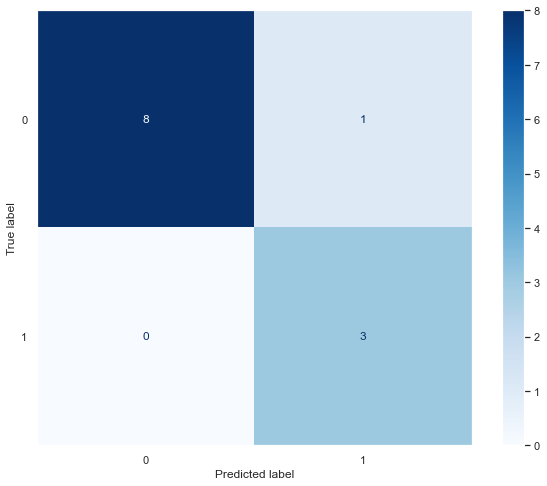

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

boost_clf = GradientBoostingClassifier()
boost_clf.fit(X_train,y_train.ravel())

ConfusionMatrixDisplay.from_estimator(boost_clf,X_test,y_test,cmap=plt.cm.Blues)
plt.grid(False)
plt.show()